

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless with Video





Import Libraries & get url


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [52]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'
fourWeeksAgo = !date -d "4 week ago 13:00 " '+%Y-%m-%d'

beginDate = fourWeeksAgo
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-20'] ['2016-12-19'] ['2016-12-14']
['2016-11-23']
'2016-11-23'


### get url

In [77]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'// graffiti

#  mission homeless https://data.sfgov.org/resource/7rca-bkvr.json
url = 'https://data.sfgov.org/resource/7rca-bkvr.csv'


# mission encampment   https://data.sfgov.org/resource/594p-sp4v.json
url2 = 'https://data.sfgov.org/resource/594p-sp4v.csv'

modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)

url2 = url2 + modify + operator + str(startdate)
print(url2)
print('url is concerns, url2 is encampments')


https://data.sfgov.org/resource/7rca-bkvr.csv?$where=opened>='2016-11-23'
https://data.sfgov.org/resource/594p-sp4v.csv?$where=opened>='2016-11-23'
url is concerns, url2 is encampments


In [78]:
df = pd.read_csv(url)

print (df.shape)
df2 = pd.read_csv(url2)
print (df2.shape)
df =  pd.concat([df,df2])
print (df.shape)

(63, 16)
(442, 16)
(505, 16)


## Set Display Column with wider so no problem with Media URL series

In [79]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [80]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [81]:
df.shape

(505, 16)

#### wow, 5 days > 1000 reports

In [82]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6647899,12/20/2016 06:25:29 PM,12/20/2016 07:01:23 PM,12/20/2016 07:01:23 PM,Closed,Insufficient Information - Insufficient infomation provided for action to be taken.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - homeless_other - request_for_service,homeless_concerns - homeless_other - request_for_service,"2300 16TH ST, SAN FRANCISCO, CA, 94103",10,Mission,"(37.765819504411, -122.409006416036)",Open311,NaN
1,6646409,12/20/2016 12:56:13 PM,12/20/2016 02:35:34 PM,12/20/2016 02:35:34 PM,Closed,Case Resolved - Police Officer responded to request under CAD # 163551927. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of 17TH ST and ALABAMA ST,9,Mission,"(37.7641932415638, -122.412293308964)",Open311,NaN
2,6645086,12/20/2016 08:56:57 AM,12/20/2016 01:05:06 PM,12/20/2016 01:05:06 PM,Closed,Case Resolved - Police Officer responded to request under CAD # 163550928. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of CLINTON PARK and STEVENSON ST,9,Mission,"(37.7693386881199, -122.42147026036)",Open311,NaN


In [83]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [84]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6647899,2016-12-20 18:25:29,2016-12-20 19:01:23,2016-12-20 19:01:23,Closed,Insufficient Information - Insufficient infomation provided for action to be taken.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - homeless_other - request_for_service,homeless_concerns - homeless_other - request_for_service,"2300 16TH ST, SAN FRANCISCO, CA, 94103",10,Mission,"(37.765819504411, -122.409006416036)",Open311,NaN
1,6646409,2016-12-20 12:56:13,2016-12-20 14:35:34,2016-12-20 14:35:34,Closed,Case Resolved - Police Officer responded to request under CAD # 163551927. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of 17TH ST and ALABAMA ST,9,Mission,"(37.7641932415638, -122.412293308964)",Open311,NaN
2,6645086,2016-12-20 08:56:57,2016-12-20 13:05:06,2016-12-20 13:05:06,Closed,Case Resolved - Police Officer responded to request under CAD # 163550928. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of CLINTON PARK and STEVENSON ST,9,Mission,"(37.7693386881199, -122.42147026036)",Open311,NaN


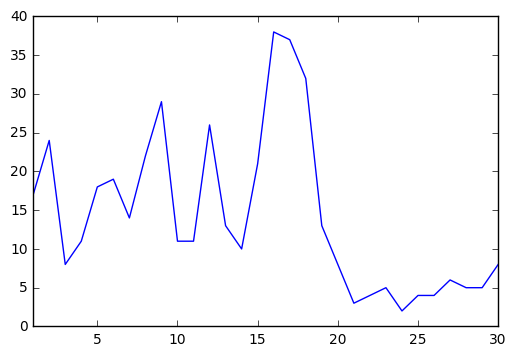

In [85]:
df.Closed.dt.day.value_counts().sort_index().plot()

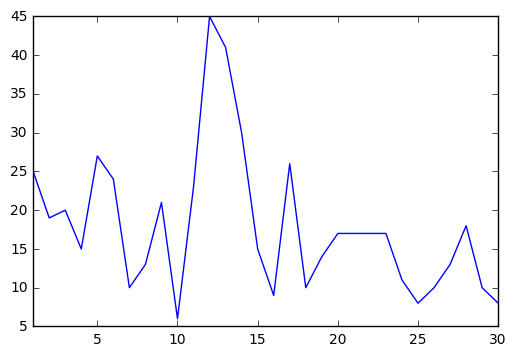

In [86]:
df.Opened.dt.day.value_counts().sort_index().plot()

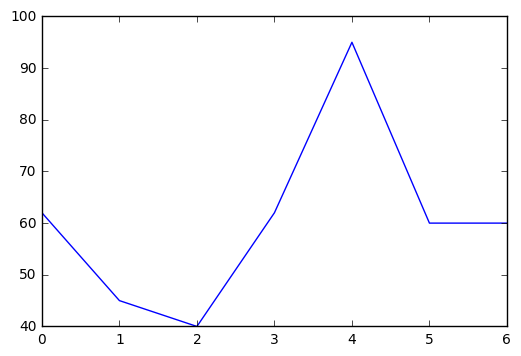

In [87]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [88]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [89]:

df['Request Details'].value_counts()


Encampment Cleanup                                               442
homeless_concerns - aggressive_behavior - request_for_service     29
homeless_concerns - wellbeing_check - request_for_service         21
homeless_concerns - homeless_other - request_for_service          13
Name: Request Details, dtype: int64

In [90]:
df['Supervisor District'].value_counts().sort_index()



6       7
8       3
9     463
10     32
Name: Supervisor District, dtype: int64

In [91]:
df.Neighborhood.value_counts()

Mission    505
Name: Neighborhood, dtype: int64

In [92]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6647899,2016-12-20 18:25:29,2016-12-20 19:01:23,2016-12-20 19:01:23,Closed,Insufficient Information - Insufficient infomation provided for action to be taken.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - homeless_other - request_for_service,homeless_concerns - homeless_other - request_for_service,"2300 16TH ST, SAN FRANCISCO, CA, 94103",10,Mission,"(37.765819504411, -122.409006416036)",Open311,NaN
1,6646409,2016-12-20 12:56:13,2016-12-20 14:35:34,2016-12-20 14:35:34,Closed,Case Resolved - Police Officer responded to request under CAD # 163551927. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of 17TH ST and ALABAMA ST,9,Mission,"(37.7641932415638, -122.412293308964)",Open311,NaN
2,6645086,2016-12-20 08:56:57,2016-12-20 13:05:06,2016-12-20 13:05:06,Closed,Case Resolved - Police Officer responded to request under CAD # 163550928. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of CLINTON PARK and STEVENSON ST,9,Mission,"(37.7693386881199, -122.42147026036)",Open311,NaN
3,6644743,2016-12-20 07:28:00,NaT,2016-12-20 08:29:44,Open,open,DPW Ops Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,"268 ALABAMA ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766253915935, -122.412683298059)",Web Self Service,NaN
4,6643772,2016-12-19 16:30:29,2016-12-19 17:59:14,2016-12-19 17:59:14,Closed,"Case Resolved - Unknown CAD Disposition, Default to Resolved",Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"1455 15TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766737610945, -122.416803869036)",Open311,NaN
5,6638204,2016-12-17 16:22:57,2016-12-17 23:19:53,2016-12-17 23:19:53,Closed,Case Resolved - Police Officer responded to request under CAD # 163522494. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,Intersection of 16TH ST and SHOTWELL ST,9,Mission,"(37.765249409965, -122.416387642122)",Open311,NaN
6,6637520,2016-12-17 12:01:32,2016-12-18 04:19:31,2016-12-18 04:19:31,Closed,Case Resolved - Police Officer responded to request under CAD # 163521566. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - homeless_other - request_for_service,homeless_concerns - homeless_other - request_for_service,"3300 26TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.749287646651, -122.416218783083)",Open311,NaN
7,6637477,2016-12-17 11:45:34,2016-12-17 12:03:01,2016-12-17 12:03:01,Closed,Insufficient Information - Insufficient infomation provided for action to be taken.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"240 SHOTWELL ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.764751154394, -122.416438535593)",Open311,NaN
8,6637472,2016-12-17 11:42:12,2016-12-17 23:19:29,2016-12-17 23:19:29,Closed,Case Resolved - Police Officer responded to request under CAD # 163521492. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - homeless_other - request_for_service,homeless_concerns - homeless_other - request_for_service,"1486 SOUTH VAN 


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [93]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [94]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


Series([], Name: Media URL, dtype: object)


In [95]:
print(peskin[:])

Series([], Name: Media URL, dtype: object)


# The whole City

In [96]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0      http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d3a83da153f1b6e8509d/photo_20161220_165743.jpg
1                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859cd4e3da153f1b6e84f1d/report.jpg
2                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859629b3da153f1b6e83a47/report.jpg
3                     http://mobile311.sfgov.org/media/san_francisco/report/photos/58593e8d3da153f1b6e833e9/report.jpg
4                     http://mobile311.sfgov.org/media/san_francisco/report/photos/58588f723da153f1b6e82d0c/report.jpg
5      http://mobile311.sfgov.org/media/san_francisco/report/photos/58584d1d3da153f1b6e82343/photo_20161219_131157.jpg
6      http://mobile311.sfgov.org/media/san_francisco/report/photos/58584cb23da153f1b6e82328/photo_20161219_130950.jpg
7                     http://mobile311.sfgov.org/media/san_francisco/report/photos/585844f53da153f1b6e8212c/report.jpg
8                     http://mobile311.sfgov.org

In [97]:
len(images)

210

In [98]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d3a83da153f1b6e8509d/photo_20161220_165743.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5859629b3da153f1b6e83a47/report.jpg


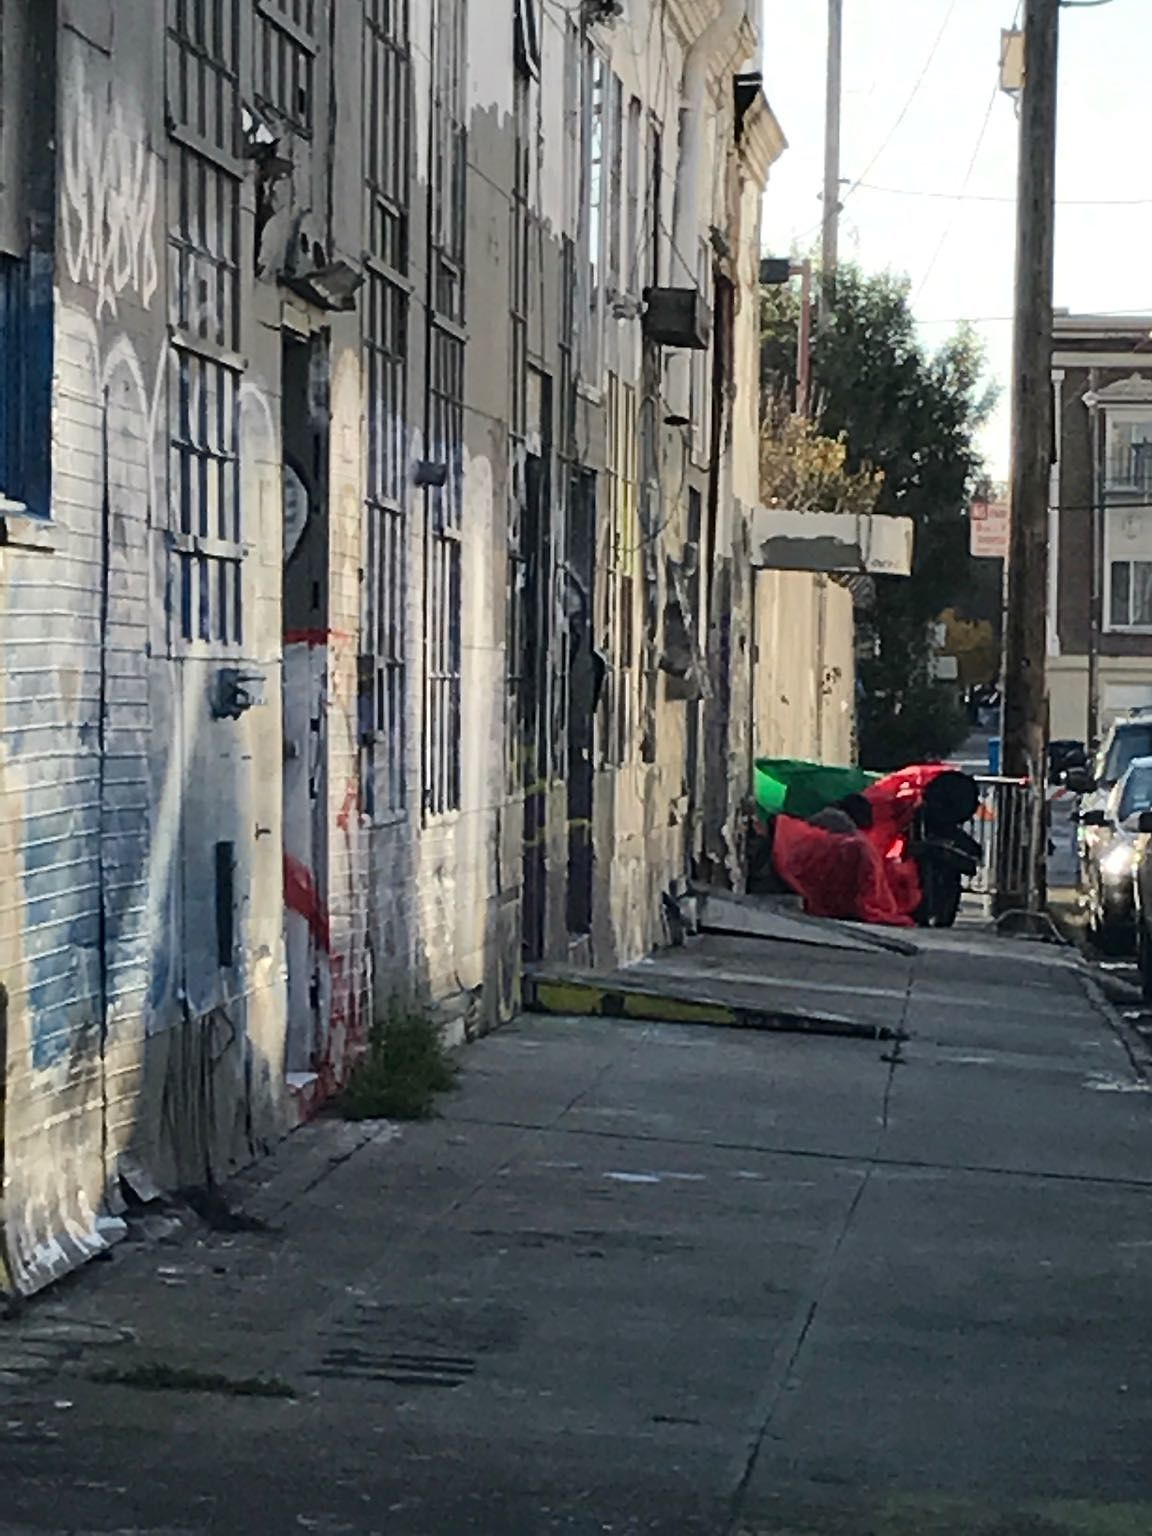

In [99]:
print(images[2])
Image(images[2])


In [100]:
!pwd

/home/gdillon/JupyterPractice/homeless_SF311


In [101]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [102]:
!yes| bash vidCreate.sh 

--2016-12-21 22:22:59--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d3a83da153f1b6e8509d/photo_20161220_165743.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146763 (143K) [image/jpeg]
Saving to: 'photo_20161220_165743.jpg'

photo_20161220_1657 100%[===================>] 143.32K   739KB/s    in 0.2s    

2016-12-21 22:23:00 (739 KB/s) - 'photo_20161220_165743.jpg' saved [146763/146763]

--2016-12-21 22:23:00--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5859cd4e3da153f1b6e84f1d/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 277668 (271K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 271.16K  --.-KB/s    in 0.1s    

2016-12-21 22:23:00 (2.27 MB/s) - 'report.jpg' saved

In [ ]:
!ls -la


In [103]:
df.to_csv('missionHomeless.csv')